# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M Kasim Azhari Hasibuan
- **Email:** azhari.hsb27@gmail.com
- **ID Dicoding:** azharihsb

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara cuaca dan jumlah penyewaan sepeda di tiap harinya?
- Bagaimana pola penyewaan sepeda berubah dari musim tiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat tabel hour

In [23]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan tabel hour_df, penyewaan sepeda paling banyak terjadi di siang hari(14-15 siang)
- Jumlah penyewaan sepeda selalu lebih banyak dilakukan oleh penyewa terdaftar dari pada penyewa biasa

### Assessing Data

#### Memeriksa kesalahan pada dataset hour

Melakukan pengecekan tipe data dan missing value terhadap dataset dengan method info()

In [24]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada dataset di atas terdapat kesalahan tipe pada variabel dteday.

Dan juga variabel season, yr, mnth, weekday, weathersit dapat dikonversi agar sesuai dengan representasi value

In [25]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe(include="all")

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dapat dilihat bahwa variabel temp, atemp, hum, dan windspeed telah dinormalisasi. Lebih baik dikembalikan ke nilai semula agar lebih mudah dimengerti

#### Memeriksa apakah ada outlier pada variabel temp

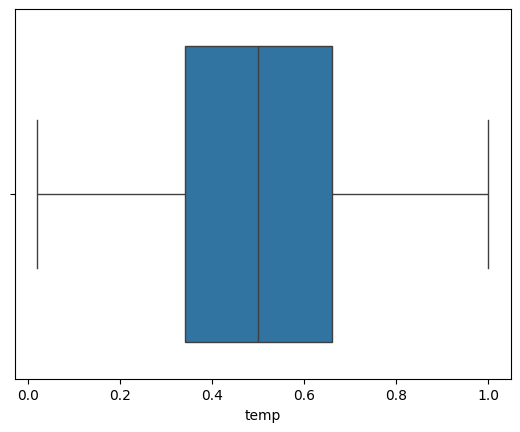

In [26]:
sns.boxplot(x=hour_df["temp"])
plt.show()

Berdasarkan gambar di atas dapat dipastikan bahwa tidak ada outlier pada variabel temp

### Cleaning Data

Menangani kesalahan tipe data variabel dteday

In [27]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengkonversi value dari variabel season menjadi representasi value yaitu: 1 untuk Spring, 2 untuk Summer, 3 untuk Fall, dan 4 untuk Winter

In [28]:
seasons = {1: "Springer", 2: "Summer", 3:"Fall", 4: "Winter"}

hour_df["season"] = hour_df["season"].map(seasons)
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15638,15639,2012-10-18,Winter,1,10,19,0,4,1,2,0.56,0.5303,0.68,0.2985,42,471,513
14300,14301,2012-08-24,Fall,1,8,1,0,5,1,2,0.64,0.6061,0.73,0.0000,5,37,42
11470,11471,2012-04-28,Summer,1,4,3,0,6,0,1,0.34,0.3182,0.49,0.2239,3,23,26
12091,12092,2012-05-24,Summer,1,5,0,0,4,1,1,0.60,0.5606,0.83,0.0896,7,49,56
15637,15638,2012-10-18,Winter,1,10,18,0,4,1,2,0.56,0.5303,0.64,0.3284,68,720,788


Mengkonversi value dari variabel yr agar sesuai dengan dteday

In [29]:
hour_df["yr"] = hour_df["dteday"].dt.year
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11835,11836,2012-05-13,Summer,2012,5,8,0,0,0,1,0.56,0.5303,0.64,0.1642,32,124,156
17322,17323,2012-12-29,Springer,2012,12,15,0,6,0,2,0.24,0.2424,0.87,0.0000,19,110,129
570,571,2011-01-25,Springer,2011,1,23,0,2,1,2,0.22,0.2273,0.64,0.1642,3,37,40
15774,15775,2012-10-24,Winter,2012,10,11,0,3,1,1,0.58,0.5455,0.64,0.0000,47,189,236
1073,1074,2011-02-17,Springer,2011,2,11,0,4,1,2,0.44,0.4394,0.44,0.2537,19,71,90


Mengkonversi value dari variabel mnth berdasarkan bulan pada variabel dteday

In [30]:
hour_df["mnth"] = hour_df["dteday"].dt.month_name()
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11526,11527,2012-04-30,Summer,2012,April,11,0,1,1,2,0.44,0.4394,0.44,0.1045,52,111,163
39,40,2011-01-02,Springer,2011,January,16,0,0,0,3,0.34,0.3333,0.71,0.1642,9,67,76
9690,9691,2012-02-13,Springer,2012,February,17,0,1,1,1,0.36,0.3485,0.23,0.1940,8,399,407
846,847,2011-02-07,Springer,2011,February,17,0,1,1,2,0.32,0.3182,0.70,0.1642,9,207,216
16222,16223,2012-11-13,Winter,2012,November,16,0,2,1,1,0.38,0.3939,0.40,0.2985,28,282,310


Mengkonversi value dari variabel weekday menjadi hari berdasarkan variabel dteday

In [31]:
hour_df["weekday"] = hour_df["dteday"].dt.day_name()
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9423,9424,2012-02-02,Springer,2012,February,13,0,Thursday,1,2,0.42,0.4242,0.77,0.0000,13,124,137
13730,13731,2012-07-31,Fall,2012,July,7,0,Tuesday,1,1,0.68,0.6364,0.83,0.2239,21,492,513
11218,11219,2012-04-17,Summer,2012,April,15,0,Tuesday,1,1,0.66,0.6212,0.24,0.3284,91,217,308
7482,7483,2011-11-13,Winter,2011,November,9,0,Sunday,0,1,0.40,0.4091,0.54,0.2836,38,97,135
17051,17052,2012-12-18,Winter,2012,December,6,0,Tuesday,1,1,0.36,0.3485,0.93,0.1642,1,117,118


Mengkonversi value dari variabel weathersit sesuai dengan representasi value yaitu: 1 untuk Clear, 2 untuk Mist, 3 untuk Light Snow, dan 4 untuk Heavy Rain

In [32]:
weathersits = {1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"}

hour_df["weathersit"] = hour_df["weathersit"].map(weathersits)
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13729,13730,2012-07-31,Fall,2012,July,6,0,Tuesday,1,Clear,0.64,0.5758,0.89,0.1642,2,192,194
5749,5750,2011-09-02,Fall,2011,September,0,0,Friday,1,Clear,0.64,0.6061,0.65,0.1940,6,58,64
5,6,2011-01-01,Springer,2011,January,5,0,Saturday,0,Mist,0.24,0.2576,0.75,0.0896,0,1,1
8274,8275,2011-12-16,Winter,2011,December,10,0,Friday,1,Clear,0.34,0.3030,0.46,0.2985,10,122,132
12354,12355,2012-06-03,Summer,2012,June,23,0,Sunday,0,Clear,0.58,0.5455,0.53,0.1045,26,82,108


Mengkonversi temp, atemp, hum, windspeed ke nilai sebelum dinormalisasi

In [33]:
hour_df["temp"] = hour_df["temp"]*41
hour_df["atemp"] = hour_df["atemp"]*50
hour_df["hum"] = hour_df["hum"]*100
hour_df["windspeed"] = hour_df["windspeed"]*67

hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17342,17343,2012-12-30,Springer,2012,December,11,0,Sunday,0,Clear,10.66,11.365,41.0,27.9993,33,103,136
9529,9530,2012-02-07,Springer,2012,February,0,0,Tuesday,1,Clear,12.30,14.395,70.0,12.9980,1,22,23
4481,4482,2011-07-10,Fall,2011,July,15,0,Sunday,0,Clear,34.44,37.120,39.0,19.0012,142,219,361
9001,9002,2012-01-15,Springer,2012,January,22,0,Sunday,0,Clear,7.38,10.605,37.0,6.0032,2,58,60
10849,10850,2012-04-02,Summer,2012,April,5,0,Monday,1,Clear,16.40,20.455,76.0,32.9975,2,22,24


In [34]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Menyimpan hour_df ke file yang baru

In [35]:
hour_df.to_csv("dashboard/clear_hour_df.csv", index=False)

**Insight:**
- Agar dapat mengubah tipe data yang salah menjadi tipe data waktu, kita dapat menggunakan method to_datetime()
- Kita dapat mengubah nilai angka pada variabel season, mnth, weekday dll menjadi representasi value nya agar lebih mudah dimengerti
- Begitu juga dengan temp, atemp, dan yang lainnya agar lebih mudah membacanya

## Exploratory Data Analysis (EDA)

Mengelompokkan penyewaan sepeda untuk setiap tahun

In [36]:
hour_df.groupby("yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Mengelompokkan penyewaan sepeda untuk setiap season

In [37]:
hour_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Mengelompokkan penyewaan sepeda untuk setiap cuaca

In [38]:
hour_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
weathersit,,,
Clear,462745,1875428,2338173
Heavy Rain,8,215,223
Light Snow,22783,135548,158331
Mist,134481,661471,795952


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara cuaca dan jumlah penyewaan sepeda di tiap harinya?

Mengelompokkan jumlah penyewaan sepeda berdasarkan cuaca dan menyimpannya ke variabel rentals_by_weekday

In [39]:
rentals_by_weekday = hour_df.groupby(["weekday","weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
rentals_by_weekday.head(28)

casual  registered     cnt
weekday   weathersit                            
Friday    Clear        55244      278077  333321
          Light Snow    2714       18786   21500
          Mist         20280      112689  132969
Monday    Clear        48438      255059  303497
          Heavy Rain       6         158     164
          Light Snow    2087       17872   19959
          Mist         20253      111630  131883
Saturday  Clear       114826      232855  347681
          Heavy Rain       1          22      23
          Light Snow    5287       14003   19290
          Mist         33738       77075  110813
Sunday    Clear       112057      231536  343593
          Light Snow    5399       14278   19677
          Mist         23065       57692   80757
Thursday  Clear        48064      306776  354840
          Light Snow    1508       16960   18468
          Mist         11888      100199  112087
Tuesday   Clear        42090      284891  326981
          Light Snow    2852       24965   27817
          Mist         12901      101410  114311
Wednesday Clear        42026      286234  328260
          Heavy Rain       1          35      36
          Light Snow    2936       28684   31620
          Mist         12356      100776  113132

Menggunakan visualisasi clustered bar chart untuk membandingkan data berdasarkan cuaca di tiap harinya

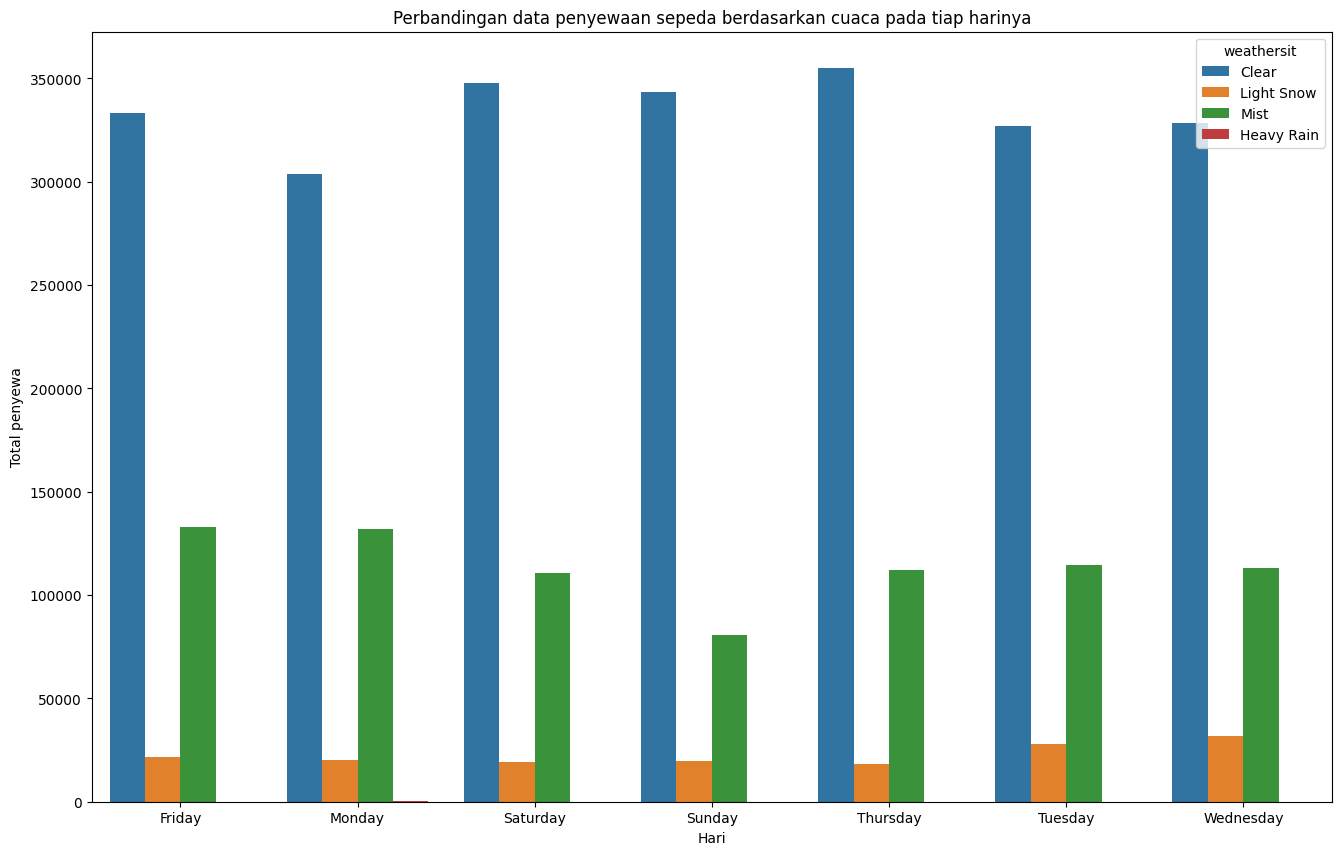

In [40]:
plt.figure(figsize=(16, 10))
sns.barplot(data=rentals_by_weekday, x="weekday", y="cnt", hue="weathersit")
plt.title("Perbandingan data penyewaan sepeda berdasarkan cuaca pada tiap harinya")
plt.xlabel("Hari")
plt.ylabel("Total penyewa")
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berubah dari musim tiap tahunnya?

Mengelompokkan jumlah penyewaan sepeda dari musim ke musim

In [41]:
rentals_each_season = hour_df.groupby(["yr","season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
rentals_each_season.head(28)

casual  registered     cnt
yr   season                              
2011 Fall       95450      324200  419650
     Springer   21425      128575  150000
     Summer     77564      269752  347316
     Winter     52813      273324  326137
2012 Fall      130641      510838  641479
     Springer   39197      282151  321348
     Summer    125958      445315  571273
     Winter     76969      438507  515476

Menggunakan visualisasi clustered bar chart untuk membandingkan data berdasarkan musim di tiap tahunnya

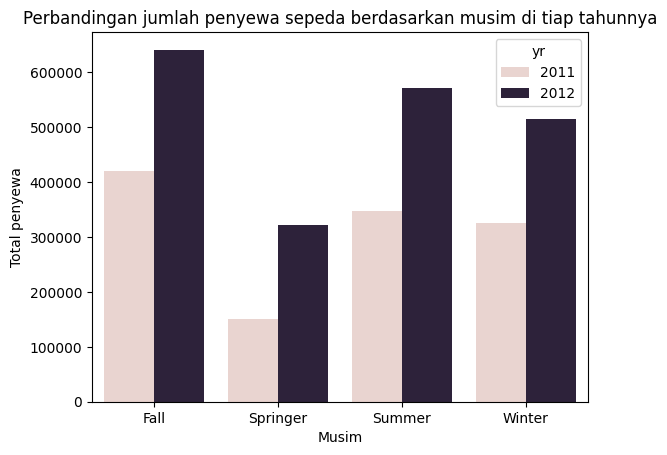

In [42]:
sns.barplot(data=rentals_each_season, x="season", y="cnt", hue="yr")
plt.title("Perbandingan jumlah penyewa sepeda berdasarkan musim di tiap tahunnya")
plt.xlabel("Musim")
plt.ylabel("Total penyewa")
plt.show()

## Conclusion

- Dari Visualisasi Clustered Bar Chart per hari di atas cuaca sangat menentukan apakah seseorang akan menyewa sepeda atau tidak. Dapat dilihat bahwa cuaca orang-orang paling banyak menyewa sepeda pada saat cuaca Clear dan paling sedikit pada cuaca Heavy Rain
- Dari Visualisasi Clustered Bar Chart per musim di atas dapat disimpulkan bahwa pada tahun 2011 maupun 2012, penyewaan terjadi paling banyak pada musim Fall, lalu diikuti oleh Summer, kemudian Winter, dan yang terakhir adalah Springer